# ENGLAND PROPERTIES PRICES

Data source: https://www.kaggle.com/arnavkulkarni/housing-prices-in-london 

## OBJECTIVES

#### The dataset used in this notebook comprises of various property listings in England. The objectives of this notebook are as follows:

- Perform descriptive statistics on the dataset.
- Observations and assumptions of linear models.
- Predict the price of the houses using machine learning regression models. 
- Model comparison and evaluation.

## SECTION 1: DESCRIPTIVE STATISTICS ANALYSIS

##### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

##### Reading and getting information from the london dataset

In [2]:
london = pd.read_csv('London.csv')
london.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [3]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


- There are 11 columns and 3480 rows. 
- Some of the features are objects and others integers.  
- Only the 'Location' column has some null/missing values.
- The target variable is 'Price'.
- This dataset is contained in about 299kB space.

The 'Unnamed' column is irrelevant as it signifies the index/serial numbers of the dataframe. Next, is to drop the 'Unnamed' column.

In [4]:
london.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
london.describe()

,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


From the above, the basic statistics of the numerical columns (int64 datatype) was derived.Some deductions include;
- The average price of a house is 1864173 GBP, while the most expensive house is priced at 39750000 GBP.
- The total number of records is 3480.
- The maximum bathrooms, bedrooms and receptions that can be found in any house is 10.
- Simlarly, there are some houses with no bathroom, bedroom and reception.
- Half of the houses have 3 bathrooms, bedrooms and receptions available.

Next, the statistics for the categorical columns with object datatype will be derived.

In [6]:
london.describe(include = ['object'])

,Property Name,House Type,Location,City/County,Postal Code
count,3480,3480,2518,3480,3480
unique,2380,8,656,57,2845
top,Television Centre,Flat / Apartment,Putney,London,SW6 3LF
freq,17,1565,96,2972,14


From the above statistics, the following can be deduced;

- There are 2380 unique property names. This means that almost all the properties have unique names. Hence, this feature will not be necessary for the price prediction.
- There are 8 different types of houses in the dataset. 
- The dataset comprises of data gotten from 57 cities/counties with 2845 different postcodes.
- The location feature has some missing values, as the count (2518) is less than the expected number of entries (3480).

In [7]:
london['House Type'].unique()
#london['House Type'].nunique()

array(['House', 'Flat / Apartment', 'New development', 'Duplex',
       'Penthouse', 'Studio', 'Bungalow', 'Mews'], dtype=object)

##### Missing values function

Getting a clearer view of the missing value columns, a function (miss_vals) that reads missing values is defined as below;

In [8]:
def miss_vals(df):
    """This function takes a dataFrame(df) as input and returns the total missing values of each column"""
    missing_total = df.isnull().sum().sort_values(ascending = False)
    missing_percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    return pd.concat([missing_total, missing_percent], axis = 1, keys = ['Total_Missing', 'Percent_Missing'])

In [9]:
miss_vals(london)

,Total_Missing,Percent_Missing
Location,962,27.64
Postal Code,0,NaN
City/County,0,NaN
No. of Receptions,0,NaN
No. of Bathrooms,0,NaN
No. of Bedrooms,0,NaN
Area in sq ft,0,NaN
House Type,0,NaN
Price,0,NaN
Property Name,0,NaN


There are 962 missing values, which validates the 2518 non-null values as seen earlier. The total missing values(962) + total non-null values(2518) = 3480 expected values.

A total of 27.64% of the location values are missing, thus reducing the confidence level of the feature. 

Just before dealing with the missing values, next is to explore the data set to see the relationship between some of the features.

Some questions to derive from the dataset;

1.) What are the 5 most expensive properties in England, their cities and prices.

2.) Similarly, the 5 least expensive properties in England, their cities and prices.

In [10]:
country_price = pd.concat([london[['City/County', 'Price', 'House Type']]], axis = 1)

In [11]:
exp_props = country_price.sort_values(by = 'Price', ascending = False).head()
exp_props

,City/County,Price,House Type
1851,London,39750000,New development
3352,London,34000000,House
3420,London,25000000,House
3434,London,25000000,New development
3306,London,23950000,New development


The 5 most expensive properties in England are all in London, some are new developments and others, houses. 

The most expensive new development is 39,750,000 GBP.

In [12]:
cheap_props = country_price.sort_values(by = 'Price').head()
cheap_props

,City/County,Price,House Type
347,London,180000,Flat / Apartment
350,London,210000,Studio
659,London,249999,Flat / Apartment
2763,London,255000,Flat / Apartment
154,London,260000,Studio


The 5 cheapest properties in England are also situated in London, some are flat/apartments and others, studios. 

The cheapest flat/apartment is 180,000 GBP.

Text(0.5, 1.0, 'Cheap Properties')

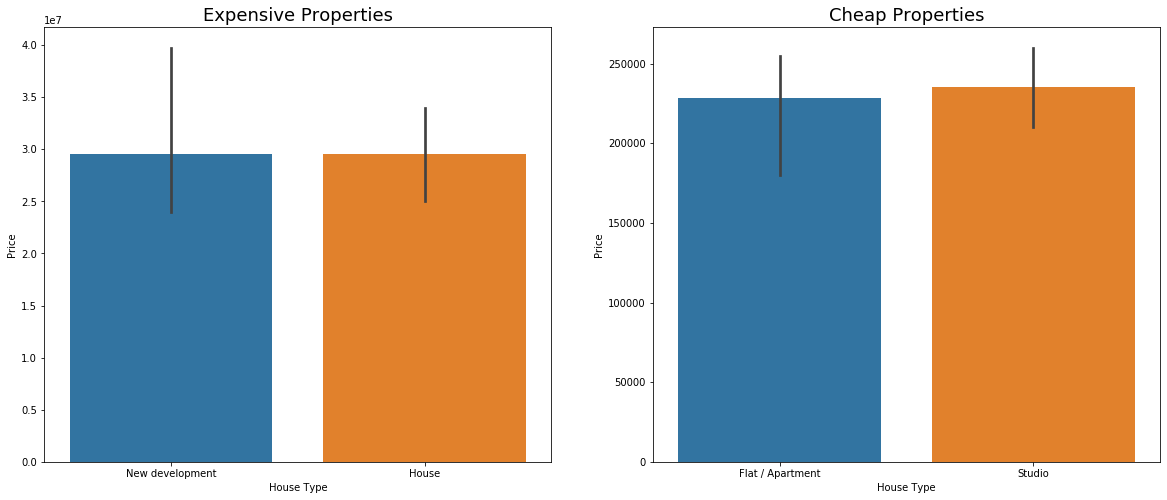

In [13]:
fig, ax = plt.subplots(figsize = (20,8), ncols = 2)

ax1 = sns.barplot(x="House Type", y = 'Price', data=exp_props, ax = ax[0])
ax2 = sns.barplot(x="House Type",  y = 'Price', data=cheap_props, ax = ax[1])


ax1.set_title("Expensive Properties", fontsize = 18)
ax2.set_title("Cheap Properties",  fontsize = 18)

From the above plot, the average price of an expensive new development or house in London is about 29 million pounds.

The average price of a relatively cheap studio in London is about 230,000 pounds. While that of a flat/apartment is slightly cheaper by about 5000 pounds.

In [14]:
unique_locations = london['Location'].nunique()
print("There are {} unique locations from our dataset.".format(unique_locations))

There are 656 unique locations from our dataset.


This column will be dropped to avoid assigning the wrong location in the bid to fill in the missing values of location. The City/County feature will serve as the location for the properties.

In [15]:
london.drop(['Location'], axis = 1, inplace = True)
london.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,London,SW15 1PL


## SECTION 2: OBSERVATION AND ASSUMPTIONS

There are more than one independent variable to be used to predict the dependent variable (price). The following assumptions will be checked to validate the use of a linear model;

- SKEWNESS
- CORRELATION AND P-VALUE
- LINEARITY
- HOMOSCEDASTICITY
- MULTICOLLINEARITY

To use any linear model (in this case, multiple linear regression), it is important that the features are normally distributed. This will be explored by checking the skewness.

### SKEWNESS

With focus on the dependent variable, the skewness is checked with a distribution plot. 
Outliers are also examined using a box plot as seen below. 

C:\Users\Funmi\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if sys.path[0] == '':


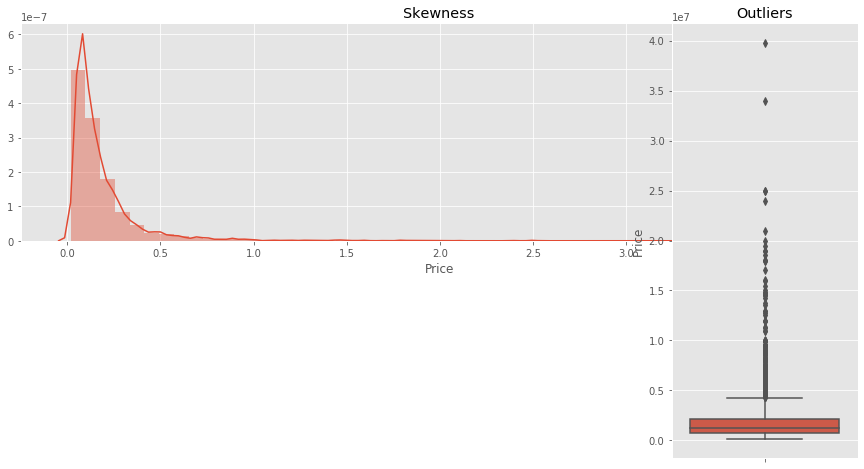

In [16]:
def skew_outlier(df, feature):
#Function to plot the distribution and box plot to check for outliers.
    
    #Importing other necessary libraries 
    import matplotlib.gridspec as gridspec
    import matplotlib.style as style
    style.use('ggplot')

    #Creating customized chart with figures and grids of 2 columns and 2 rows 
    cust_fig = plt.figure(constrained_layout=True, figsize=(15,8)) 
    cust_grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    plt.subplots_adjust(wspace = 2.5, hspace = .001)
    #fig.tight_layout()
    #fig.canvas.print_figure(bytes_io, **kw)

    #Plotting the distribution to check the skewness using histogram plot 
    ax1 = cust_fig.add_subplot(cust_grid[0, :2])
    ax1.set_title('Skewness') 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    #Plotting the box plot to check for outliers 
    ax2 = cust_fig.add_subplot(cust_grid[:, 1])
    ax2.set_title('Outliers')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax2 );
    
skew_outlier(london, 'Price')

From the plots above, the dependent/target variable is not normally distributed and contains some outliers. These outliers at the very top seem to be prices above 34million pounds.This will be checked next.

From the distribution plot, it is seen that the price variable is right-skewed (positive skewness). To verify the extent to which it is skewed, we can check for the skew value itself.

In [17]:
#Checking the outliers
london[london['Price']> 34000000]

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code
1851,No.1 Grosvenor Square,39750000,New development,5623,5,5,5,London,W1K 4AB


The outlier appears to be the very expensive new development. This isn't out of place as it is a new development with the area covered to be above the average area as seen in the SECTION 1. 

In [18]:
price_skew = london['Price'].skew()
price_kurt = london['Price'].kurt()

print('The skewness of price is: ', price_skew)
print('The kurtosis of price is: ', price_kurt)

The skewness of price is:  5.77264550423514
The kurtosis of price is:  55.76316936927734


In [19]:
#Importing necessary library
from scipy.stats import skew

#All numerical variables that are data type is not object
numeric_var = london.dtypes[london.dtypes != "object"].index

#Getting the skewness in descending order
skew_var = london[numeric_var].apply(lambda x: skew(x)).sort_values(ascending=False)

skew_var

Price                5.770157
Area in sq ft        3.111337
No. of Receptions    0.610773
No. of Bathrooms     0.610773
No. of Bedrooms      0.610773
dtype: float64

The skewness of price and area are high as compared to others. Nonetheless, all the variables skewness above 0.5 will be corrected.

This verifies that the target variable is highly skewed. 

Next, the correlation between the target variables and other features is examined. 

### CORRELATION AND P-VALUE

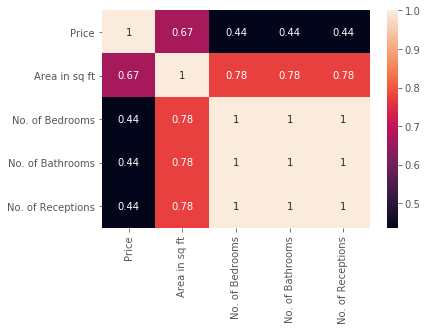

In [20]:
lon_cor = london.corr()
sns.heatmap(lon_cor, annot=True)

To get a clearer view of the numerical columns correlation with price (the target variable), in descending order; 

In [21]:
#Excluding price itself.

london.corr()['Price'].sort_values(ascending = False)[1:]

Area in sq ft        0.667710
No. of Receptions    0.435533
No. of Bathrooms     0.435533
No. of Bedrooms      0.435533
Name: Price, dtype: float64

Area in sq ft is seen to have the highest correlation with price. Other numerical features have the same extent of correlation with price.

However, we can verify the significance of their correlation using the p-value.

##### Price vs Area in sq ft 

In [22]:
#Importing other necessary libraries 
from scipy import stats

pearson_coef1, p_value1 = stats.pearsonr(london['Area in sq ft'], london['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef1, " with a P-value of P =", p_value1, ".")

The Pearson Correlation Coefficient is 0.667709603836874  with a P-value of P = 0.0 .


From the p-value obtained above, there's evidence of a significant relationship between the area in square feets and the price of the properties. The correlation shows a good linear relationship between price and area.

##### Price vs No. of Receptions

In [23]:
pearson_coef2, p_value2 = stats.pearsonr(london['No. of Receptions'], london['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef2, " with a P-value of P =", p_value2, ".")

The Pearson Correlation Coefficient is 0.43553279836804837  with a P-value of P = 4.337377540503139e-161 .


The indication on the p-value obtained shows a significant relationship with 'No. of receptions' as well as other features with the same correlation value. The correlation however, is not so strong.

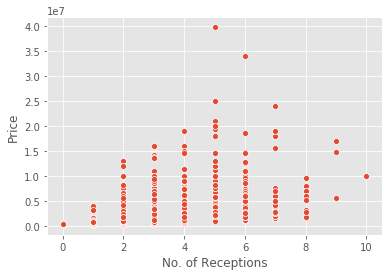

In [24]:
sns.scatterplot(x = london['No. of Receptions'], y = london['Price'])

No. of receptions appear to be a categorical variable as seen in the plot above. The price is not linearly related to the no. of receptions. This will be verified with No. of bedrooms and bathrooms.

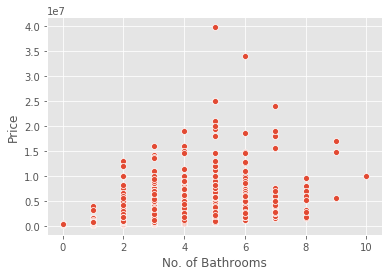

In [25]:
sns.scatterplot(x = london['No. of Bathrooms'], y = london['Price'])

Similarly, the number of bathrooms and bedrooms are also categorical variables. 

Another assumptions for linear models is LINEARITY.

### LINEARITY

To create linear regression models, the relationship between the independent and dependent variable have to be linear. Using subplots and reg plots, the linearity of some of the independent variables is checked below.

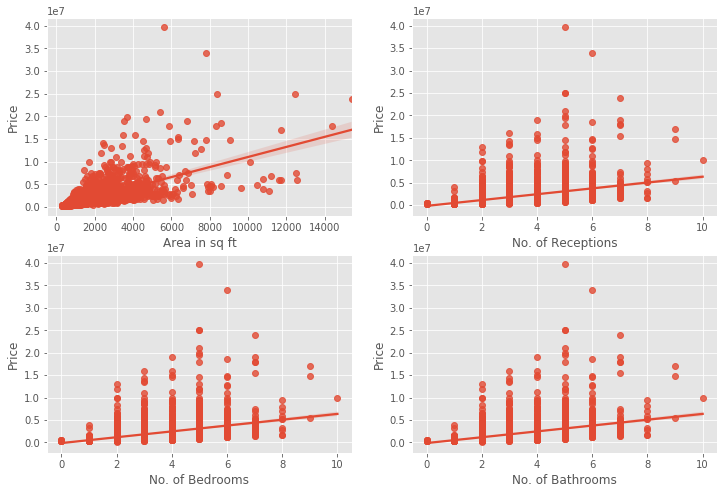

In [26]:
#Creating figures and axes
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(figsize = (12,8), ncols=2, nrows = 2, sharey=False)

#Creating a reg plot for Area in sq ft vs Price 
sns.regplot(x = 'Area in sq ft', y = 'Price', data = london, ax = ax1)

#Creating reg plot for No. of Receptions vs Price 
sns.regplot(x = 'No. of Receptions', y = 'Price', data = london, ax = ax2)

#Creating reg plot for No. of Bedrooms vs Price 
sns.regplot(x = 'No. of Bedrooms', y = 'Price', data = london, ax = ax3)

#Creating reg plot for No. of Bathrooms vs Price 
sns.regplot(x = 'No. of Bathrooms', y = 'Price', data = london, ax = ax4)

In the above plot, the dependent variable (Price) was plotted against the independent variables. 

The first plot appears to be linear with some outliers present. Others, as discussed above are categorical.

### HOMOSCEDASTICITY

To check for the error variance, the residual plot can be used between the independent variable 'Area' and dependent variable. 'Price'.

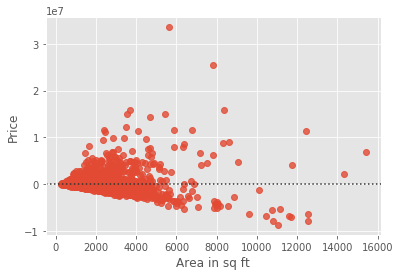

In [27]:
sns.residplot(london['Area in sq ft'], london['Price'])

The above residual plot is unstructured and shows an increment in variance as the area increases (Heteroscedasticity).

In order to use a linear model, the dependent variable will be transformed using log1p to achieve a normal distribution.

In [28]:
london['Price'] = np.log1p(london['Price'])

Now, the distribution of the target variable is checked again (using the previous function), to verify the normality. 

C:\Users\Funmi\Downloads\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if sys.path[0] == '':


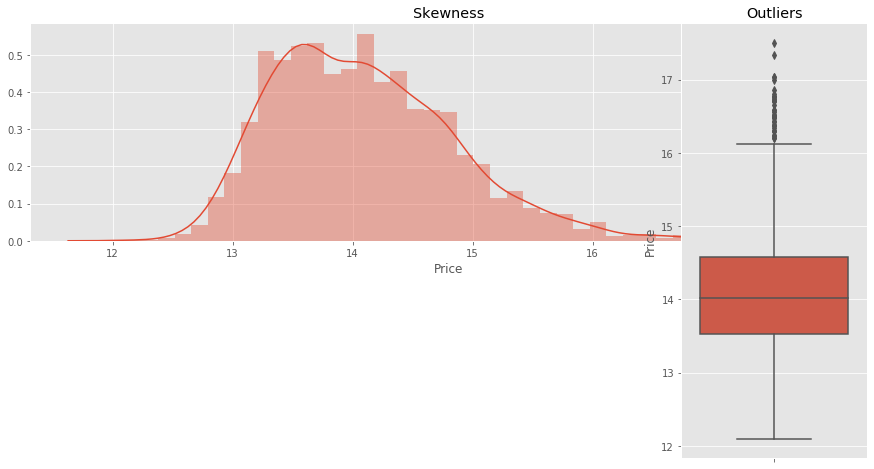

In [29]:
skew_outlier(london, 'Price')

From the above plot, the log1p corrects the distribution of the target variable, making it more symmetrically distributed. To verify this, the skewness will be checked.

In [30]:
new_skew = london['Price'].skew(axis = 0, skipna = True)
new_kurt = london['Price'].kurt()

print("The new skewness of price is ", new_skew)
print("The new kurtosis of price is ", new_kurt)

The new skewness of price is  0.6905530449995281
The new kurtosis of price is  0.48228283244383796


The skewness value for the target variable is better, as compared to the previous value obtained.

### MULTICOLLINEARITY

Now that the target variable is more symmetrically distributed, it is also important to check the correlation between the independent variables. For a linear model, the correlation between independent variables is not expected to be high. 

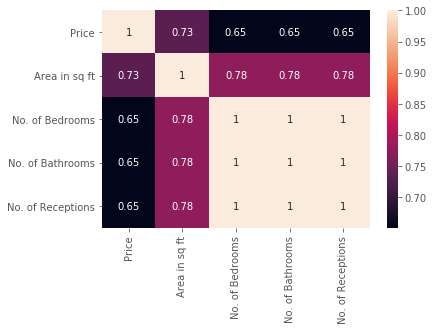

In [31]:
sns.heatmap(london.corr(), annot=True)

From the heatmap above, 3 independent variables are perfectly correlated to each other. They will be dropped during the pre modelling stage.

With the correction of errors earlier done, the correlation between the target and independent variables is checked again.

In [32]:
london.corr()['Price'].sort_values(ascending = False)[1:]

Area in sq ft        0.732674
No. of Receptions    0.650584
No. of Bathrooms     0.650584
No. of Bedrooms      0.650584
Name: Price, dtype: float64

The correlations are higher with a better distribution across the dependent variable. 

Before proceeding to the pre modelling stage, the skewness of the numeric variables will be corrected.

In [33]:
def skewness_fix(df):

    ## Import necessary libraries 
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
     
    numeric_var = london.dtypes[london.dtypes != "object"].index
    #Dropping the target variable since it has already been corrected above
    numeric_var.drop(['Price'])

    skew_var = london[numeric_var].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skew_var[abs(skew_var) > 0.5]
    skew_var = high_skew.index

    for var in skew_var:
        df[var] = boxcox1p(df[var], boxcox_normmax(df[var] + 1))

skewness_fix(london)

C:\Users\Funmi\Downloads\ANACONDA\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


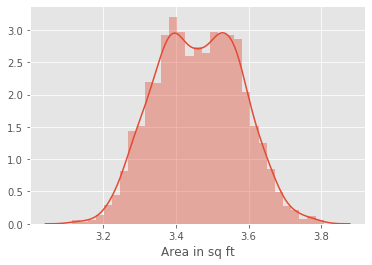

In [34]:
sns.distplot(london['Area in sq ft'])

From the plot above, the skewness has been corrected and the area is now normally distributed. 

Next is to proceed to train the model and predict the prices after splitting the dataset.

## SECTION 3: MODEL PREDICTION

##### PRE MODELING

Before training the model, all the categorical features have to be converted to numerical.

First, a quick view of the dataset.

In [35]:
london.head(5)

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code
0,Queens Road,0.239396,House,3.585071,2.397647,2.397647,2.397647,London,SW19 8NY
1,Seward Street,0.239395,Flat / Apartment,3.369072,1.309444,1.309444,1.309444,London,EC1V 3PA
2,Hotham Road,0.239395,Flat / Apartment,3.355107,1.309444,1.309444,1.309444,London,SW15 1QL
3,Festing Road,0.239396,House,3.534694,2.088324,2.088324,2.088324,London,SW15 1LP
4,Spencer Walk,0.239395,Flat / Apartment,3.337468,1.309444,1.309444,1.309444,London,SW15 1PL


There are 7 independent categorical features in the dataframe.

First, postal code

In [36]:
london['Postal Code'].nunique()

2845

There are 2845 unique values for postal codes. This feature will not be relevant for the purpose of the model to predict prices of properties.

In [37]:
london.drop(['Postal Code'], axis = 1, inplace = True)
london.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County
0,Queens Road,0.239396,House,3.585071,2.397647,2.397647,2.397647,London
1,Seward Street,0.239395,Flat / Apartment,3.369072,1.309444,1.309444,1.309444,London
2,Hotham Road,0.239395,Flat / Apartment,3.355107,1.309444,1.309444,1.309444,London
3,Festing Road,0.239396,House,3.534694,2.088324,2.088324,2.088324,London
4,Spencer Walk,0.239395,Flat / Apartment,3.337468,1.309444,1.309444,1.309444,London


In [38]:
london['Property Name'].nunique()

2380

There are 2380 unique values for property names. This feature will not be relevant for the purpose of the model to predict prices of properties.

In [39]:
london.drop(['Property Name'], axis = 1, inplace = True)
london.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County
0,0.239396,House,3.585071,2.397647,2.397647,2.397647,London
1,0.239395,Flat / Apartment,3.369072,1.309444,1.309444,1.309444,London
2,0.239395,Flat / Apartment,3.355107,1.309444,1.309444,1.309444,London
3,0.239396,House,3.534694,2.088324,2.088324,2.088324,London
4,0.239395,Flat / Apartment,3.337468,1.309444,1.309444,1.309444,London


##### Detecting outliers

In [40]:
london_out = london.copy()
london_out.drop(['Price'], axis = 1, inplace = True)

#lower quartile
Q1 = london_out.quantile(0.25)

#upper quartile
Q3 = london_out.quantile(0.75)

#Interquartile range
IQR = Q3 - Q1

In [41]:
up = (london_out < (Q1 - 1.5 * IQR)).sum()

In [42]:
lo = (london_out > (Q3 + 1.5 * IQR)).sum()

In [43]:
london_outliers = up + lo
london_outliers

Area in sq ft         0
City/County           0
House Type            0
No. of Bathrooms     14
No. of Bedrooms      14
No. of Receptions    14
dtype: int64

As seen, the outliers are only in the no. of bathrooms, bedrooms and receptions. If need be, this will be dealt with later.

The categorical features cannot be fit in the regression model. Therefore, they are converted to numerical variables using dummy variables. However, the data is firstly duplicated (to london2) to retain the original dataframe.

In [44]:
#Creating dummy variables for the categorical columns.
london2 = london.copy()

#Dropping those independent variables that had high multicollinearity between themselves
london2.drop(['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions'], axis = 1, inplace = True)

london2 = pd.get_dummies(london2, columns = ['House Type', 'City/County'], drop_first=True)
london2.head()

,Price,Area in sq ft,House Type_Duplex,House Type_Flat / Apartment,House Type_House,House Type_Mews,House Type_New development,House Type_Penthouse,House Type_Studio,City/County_27 Carlton Drive,...,City/County_Surrey,City/County_Surrey Quays,City/County_Thames Ditton,City/County_The Metal Works,City/County_Thurleigh Road,City/County_Twickenham,City/County_Wandsworth,City/County_Watford,City/County_Wimbledon,City/County_Wornington Road
0,0.239396,3.585071,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.239395,3.369072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.239395,3.355107,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.239396,3.534694,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.239395,3.337468,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### REGRESSION MODELS

##### SIMPLE LINEAR REGRESSION

For this model, the original dataframe, london will be used.

To creat a simple linear regression model, just one independent variable is used to predict the dependent variable. In this case, the variable with the highest correlation with Price will be used.

A quick check of their correlation before proceeding.

In [45]:
london.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County
0,0.239396,House,3.585071,2.397647,2.397647,2.397647,London
1,0.239395,Flat / Apartment,3.369072,1.309444,1.309444,1.309444,London
2,0.239395,Flat / Apartment,3.355107,1.309444,1.309444,1.309444,London
3,0.239396,House,3.534694,2.088324,2.088324,2.088324,London
4,0.239395,Flat / Apartment,3.337468,1.309444,1.309444,1.309444,London


In [46]:
area_corr = london['Area in sq ft'].corr(london['Price'])
print('The correlation between "Area in sq ft" and "Price" is {}.'.format(area_corr))

The correlation between "Area in sq ft" and "Price" is 0.8425996930166605.


It is clear that there exists a high correlation between area and price.

Next, the dependent variable(Price) and independent variable(Area in sq ft) are separated before splitting the data to train and test.

In [47]:
X = london['Area in sq ft']
Y = london['Price']

X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

In [48]:
print("The number of samples in this data set is {}.".format(X.shape[0]))

The number of samples in this data set is 3480.


In [49]:
print("The number of samples in this data set is {}".format(Y.shape[0]))

The number of samples in this data set is 3480


##### Splitting data to train and test

In [50]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [51]:
print("The first five samples {}".format(train_x[:5]))
print("The first five targets {}".format(train_y[:5]))
print("The number of samples in train set is {}".format(train_x.shape[0]))
print("The number of samples in test set is {}".format(test_x.shape[0]))

The first five samples [[3.34078546]
 [3.35483182]
 [3.47744351]
 [3.6838928 ]
 [3.6766705 ]]
The first five targets [[0.2393957 ]
 [0.23939498]
 [0.2393957 ]
 [0.23939709]
 [0.23939619]]
The number of samples in train set is 2784
The number of samples in test set is 696


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import math

lr = LinearRegression()
lr.fit(train_x, train_y)
lrpred_y = lr.predict(test_x)
mse = metrics.mean_squared_error(test_y, lrpred_y)

print("The Mean Squared Error {}".format(mse))
print()
print("The Model score (coefficient of determination) for the test data set is ", lr.score(test_x,test_y))
print()
print("The Model score (coefficient of determination) for the train data set is ", lr.score(train_x,train_y))
print()
print("The Mean Absolute Error (MAE) is ", mean_absolute_error(test_y, lrpred_y))
print()
print("The Root Mean Square Error (RMSE) is ", math.sqrt(mean_squared_error(test_y, lrpred_y)))
print()

df1 = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': lrpred_y.flatten()})
print('The original and predicted prices are as below;')
print()
print(df1)

The Mean Squared Error 1.0440814900756078e-13

The Model score (coefficient of determination) for the test data set is  0.669210574068296

The Model score (coefficient of determination) for the train data set is  0.7193028401288176

The Mean Absolute Error (MAE) is  2.5471036410819213e-07

The Root Mean Square Error (RMSE) is  3.231224984546275e-07

The original and predicted prices are as below;

       Actual  Predicted
0    0.239395   0.239395
1    0.239396   0.239396
2    0.239396   0.239396
3    0.239394   0.239395
4    0.239396   0.239396
..        ...        ...
691  0.239395   0.239395
692  0.239394   0.239395
693  0.239395   0.239396
694  0.239396   0.239395
695  0.239397   0.239396

[696 rows x 2 columns]


##### MULTIPLE LINEAR REGRESSION

In [53]:
london2.head()

,Price,Area in sq ft,House Type_Duplex,House Type_Flat / Apartment,House Type_House,House Type_Mews,House Type_New development,House Type_Penthouse,House Type_Studio,City/County_27 Carlton Drive,...,City/County_Surrey,City/County_Surrey Quays,City/County_Thames Ditton,City/County_The Metal Works,City/County_Thurleigh Road,City/County_Twickenham,City/County_Wandsworth,City/County_Watford,City/County_Wimbledon,City/County_Wornington Road
0,0.239396,3.585071,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.239395,3.369072,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.239395,3.355107,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.239396,3.534694,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.239395,3.337468,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X2 = london2.drop(['Price'], axis = 1)
Y2 = london2['Price']

In [55]:
print("The data shape of X2 is {}.".format(X2.shape))

print("The number of samples in this data set is {}.".format(X2.shape[0]))

print("The number of feature in this data set is {}.".format(X2.shape[1]))

The data shape of X2 is (3480, 64).
The number of samples in this data set is 3480.
The number of feature in this data set is 64.


In [56]:
print("The data shape of Y2 is {}.".format(Y2.shape))

The data shape of Y2 is (3480,).


##### Splitting data to train and test

In [57]:
from sklearn.model_selection import train_test_split
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import math

mlr = LinearRegression()
mlr.fit(train_x2, train_y2)
mlrpred_y = mlr.predict(test_x2)
mlr_mse = metrics.mean_squared_error(test_y2, mlrpred_y)

print("The Mean Squared Error (MSE) is {}".format(mlr_mse))
print()
print("The Model score (coefficient of determination) for the test data set is ", mlr.score(test_x2,test_y2))
print()
print("The Model score (coefficient of determination) for the train data set is ", mlr.score(train_x2,train_y2))
print()
print("The Mean Absolute Error (MAE) is ", mean_absolute_error(test_y2, mlrpred_y))
print()
print("The Root Mean Square Error (RMSE) is ", math.sqrt(mean_squared_error(test_y2, mlrpred_y)))
print()

df2 = pd.DataFrame()
df2['original']= test_y2
df2['predicted'] = mlrpred_y
print('The original and predicted prices are as below;')
print()
print(df2)

The Mean Squared Error (MSE) is 7.857803133020396e-14

The Model score (coefficient of determination) for the test data set is  0.7510464257662557

The Model score (coefficient of determination) for the train data set is  0.7867366262207764

The Mean Absolute Error (MAE) is  2.1991941837685846e-07

The Root Mean Square Error (RMSE) is  2.8031773281439755e-07

The original and predicted prices are as below;

      original  predicted
984   0.239395   0.239395
1296  0.239396   0.239396
1428  0.239396   0.239396
1299  0.239394   0.239395
2270  0.239396   0.239396
...        ...        ...
3179  0.239395   0.239395
2347  0.239394   0.239395
3202  0.239395   0.239395
918   0.239396   0.239395
3470  0.239397   0.239396

[696 rows x 2 columns]


## SECTION 4: MODEL COMPARISON AND EVALUATION

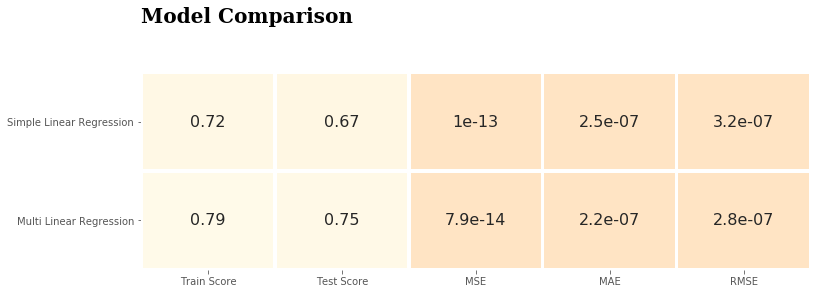

In [59]:
import matplotlib

lr_df = pd.DataFrame(data=[lr.score(train_x,train_y), lr.score(test_x,test_y), metrics.mean_squared_error(test_y, lrpred_y), mean_absolute_error(test_y, lrpred_y), math.sqrt(mean_squared_error(test_y, lrpred_y))], columns=['Simple Linear Regression'], index=["Train Score", "Test Score", "MSE", "MAE", "RMSE"])
mlf_df = pd.DataFrame(data=[mlr.score(train_x2,train_y2),mlr.score(test_x2,test_y2),metrics.mean_squared_error(test_y2, mlrpred_y), mean_absolute_error(test_y2, mlrpred_y), math.sqrt(mean_squared_error(test_y2, mlrpred_y))], columns=['Multi Linear Regression'],index=["Train Score", "Test Score", "MSE", "MAE", "RMSE"])


#df_models = round(pd.concat([lr_df,mlf_df], axis=1), 3)
df_models = pd.concat([lr_df,mlf_df], axis=1)
colors = ["bisque","ivory"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "white"

fig = plt.figure(figsize=(12, 20))
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap = colormap, annot=True, vmin=0, vmax=0.95, linewidths=2.5, cbar=False, ax=ax0, annot_kws={"fontsize":16})
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color) 

ax0.text(0,-0.5,'Model Comparison', fontsize=20, fontweight='bold', fontfamily='serif')
plt.show()

From the plot above, it is obvious that the train score for both algorithms is higher than the test score (overfitting). However, multiple linear regression is the better algorithm for this data set. 